C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


MSE	Decision tree: 7.55
R2	Decision tree: 0.91


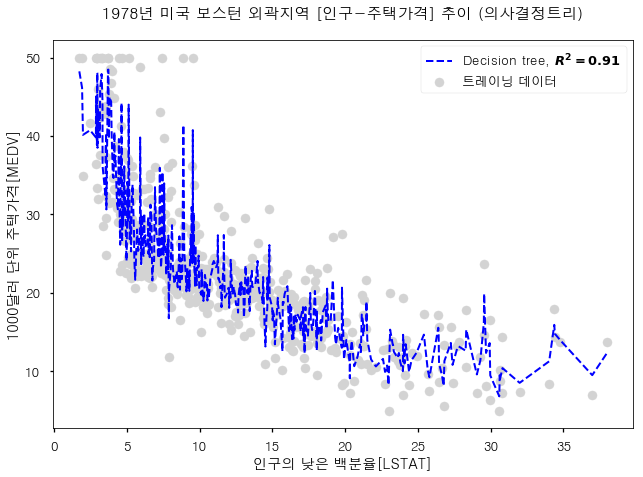

In [1]:
# 보스턴 외곽 지역 주택정보 14개 범주로 시작
# 회귀 분석 - 의사결정트리/랜덤포레스트

%matplotlib inline
#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# 회귀 분석 - 선형 회귀
from sklearn.linear_model import LinearRegression

#회귀 분석 - 다항 회귀
from sklearn.preprocessing import PolynomialFeatures

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 회귀 분석 - 의사결정트리/랜덤포레스트
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 교차 검증(Cross Vaildation)
from sklearn.cross_validation import train_test_split


style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


X = df[['LSTAT']].values
y = df['MEDV'].values

# 데이터 변형 기법
#X = np.log(X_log)
#y = np.sqrt(y_sqrt)

# 의사결정트리
#dt = DecisionTreeRegressor(max_depth=3)
dt = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

# 회귀 계산
dt.fit(X, y)

# 의사결정트리 회귀의 결과를 그래프로 표시하기 위해
# X의 요소값이 작은 순서로 정렬한 인덱스를 sort_idx로 둡니다.
sort_idx = X.ravel().argsort()

y_dt_pred = dt.predict(X[sort_idx])

# 단순 회귀 모델의 예측값 계산
mse_dt = mean_squared_error(y[sort_idx], y_dt_pred)
r2_dt = r2_score(y[sort_idx], y_dt_pred)

print('MSE\tDecision tree: %.2f' %(mse_dt))
print('R2\tDecision tree: %.2f' %(r2_dt))


plt.scatter(X[sort_idx], y[sort_idx], label='트레이닝 데이터', c='lightgray')

plt.plot(X[sort_idx], y_dt_pred, linestyle='--', label='Decision tree, $R^2=%.2f$' %r2_dt, c='blue', lw=2)

plt.xlabel('인구의 낮은 백분율[LSTAT]')
plt.ylabel('1000달러 단위 주택가격[MEDV]')
plt.title('1978년 미국 보스턴 외곽지역 [인구-주택가격] 추이 (의사결정트리)\n')
plt.legend()
plt.show()

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 

R2	Train: 0.921, Test: 0.544


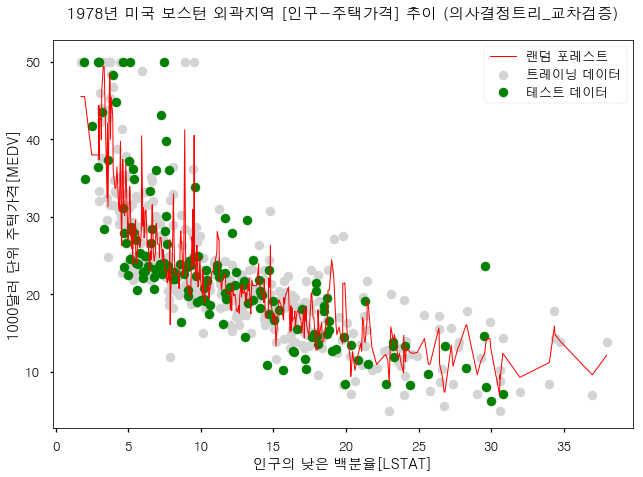

In [6]:

# 교차 검증(Cross validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2\tTrain: %.3f, Test: %.3f' %(r2_train, r2_test))

sort_idx = X.ravel().argsort()
y_cv_pred = forest.predict(X[sort_idx])

plt.scatter(X_train, y_train, label='트레이닝 데이터', c='lightgray')
plt.scatter(X_test, y_test, label='테스트 데이터', c='green')

plt.plot(X[sort_idx], y_cv_pred, linestyle='-', label='랜덤 포레스트' %r2_dt, c='r', lw=1)

plt.xlabel('인구의 낮은 백분율[LSTAT]')
plt.ylabel('1000달러 단위 주택가격[MEDV]')
plt.title('1978년 미국 보스턴 외곽지역 [인구-주택가격] 추이 (의사결정트리_교차검증)\n')
plt.legend()
plt.show()

# 샘플 데이터의 70%를 트레이닝 데이터로 해서 랜덤 포레스트로 계산한 회귀 모델의
# 결정 계수는 0.921로 매우 높지만, 테스트 데이터를 적용하면 결정 계수의 값이 0.544로
# 뚝 떨어진다. 따라서 이 데이터 모델에 대한 랜덤 포레스트 회귀 모델은 오버피팅이 강하게
# 되어 있다는 것을 알 수 있다.

In [9]:

# 회귀 분석 - 회귀 모델의 적합도 측정 포스팅
# 잔차분석(Residual Analysis)
X_ra = df.iloc[:, :-1].values
y_ra = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X_ra, y_ra, test_size=0.3, random_state=1)

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2\tTrain: %.3f, Test: %.3f' %(r2_train, r2_test))

sort_idx = X_ra.ravel().argsort()
y_cv_pred = forest.predict(X_ra[sort_idx])

plt.scatter(X_train, y_train, label='트레이닝 데이터', c='lightgray')
plt.scatter(X_test, y_test, label='테스트 데이터', c='green')

plt.plot(X_ra[sort_idx], y_cv_pred, linestyle='-', label='랜덤 포레스트' %r2_dt, c='r', lw=1)

plt.xlabel('인구의 낮은 백분율[LSTAT]')
plt.ylabel('1000달러 단위 주택가격[MEDV]')
plt.title('1978년 미국 보스턴 외곽지역 [인구-주택가격] 추이 (의사결정트리_교차검증)\n')
plt.legend()
plt.show()

# 잔차 분석 이 후 그래프로 그릴 수 없는 것에 대해 연구 필요 [M22]

# Train: 0.980, Test: 0.910 으로 결정 계수에 의하면 잔차 분석으로 트레이닝된 모델이
# 적합하다고 판단될 수 있다.

R2	Train: 0.980, Test: 0.910


IndexError: index 5305 is out of bounds for axis 0 with size 506